In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_data.shape

(768, 9)

0    500
1    268
Name: Outcome, dtype: int64


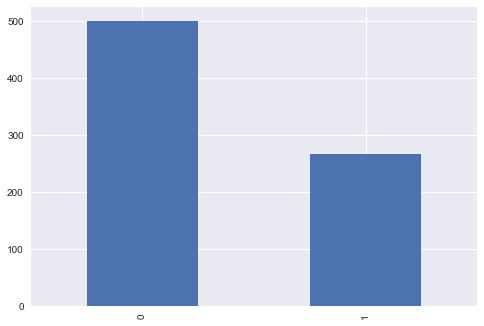

In [ ]:
print(diabetes_data.Outcome.value_counts())
p = diabetes_data.Outcome.value_counts().plot(kind="bar")
plt.show()

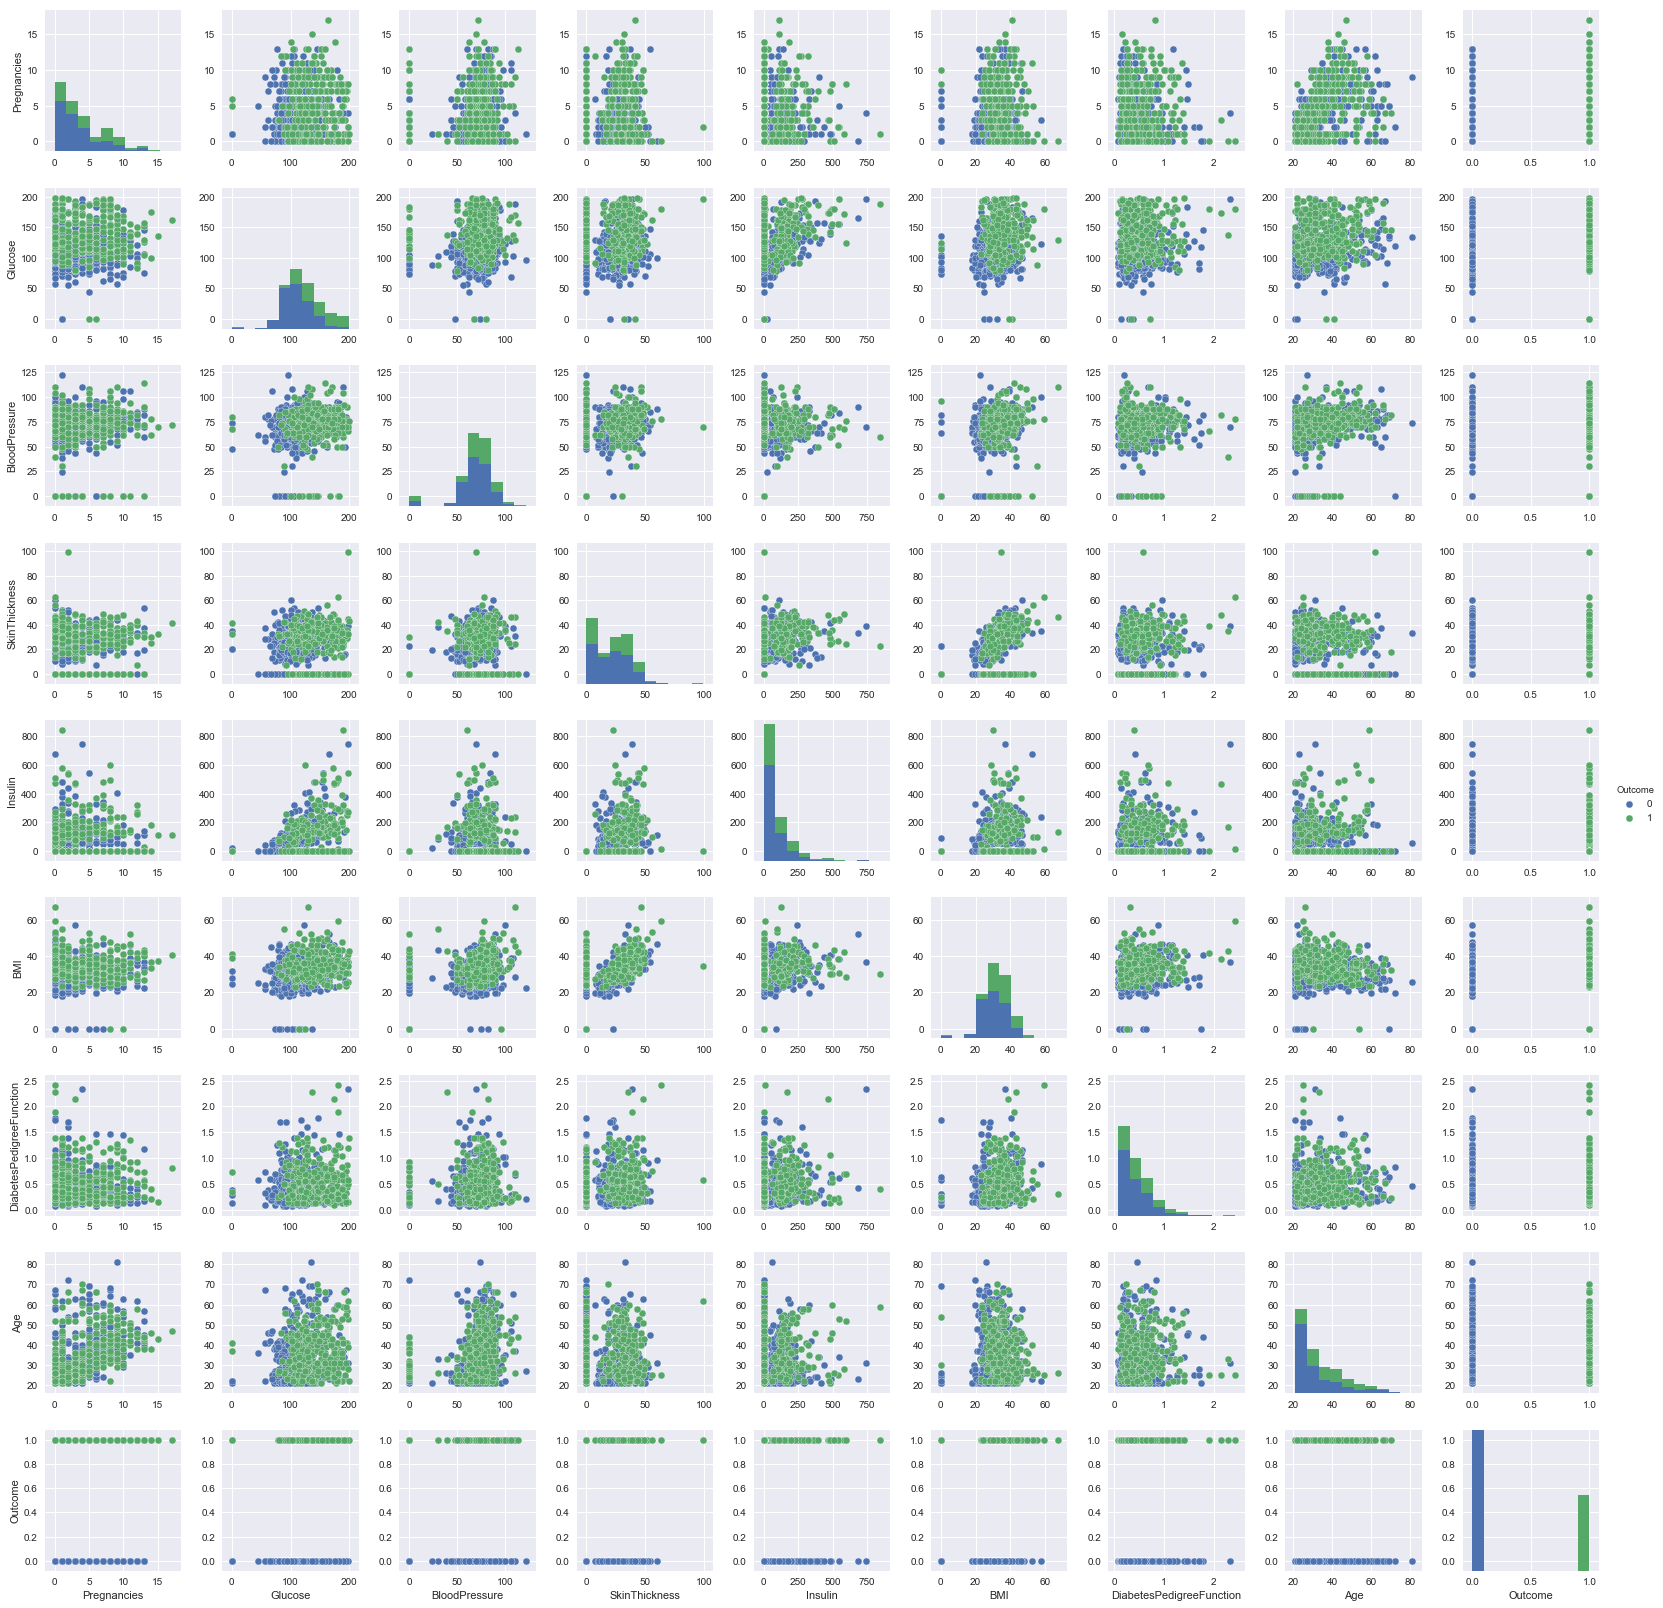

In [ ]:
p = sns.pairplot(diabetes_data, hue = 'Outcome')
plt.show()

In [ ]:
colume = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[colume] = diabetes_data[colume].replace(0, np.nan)

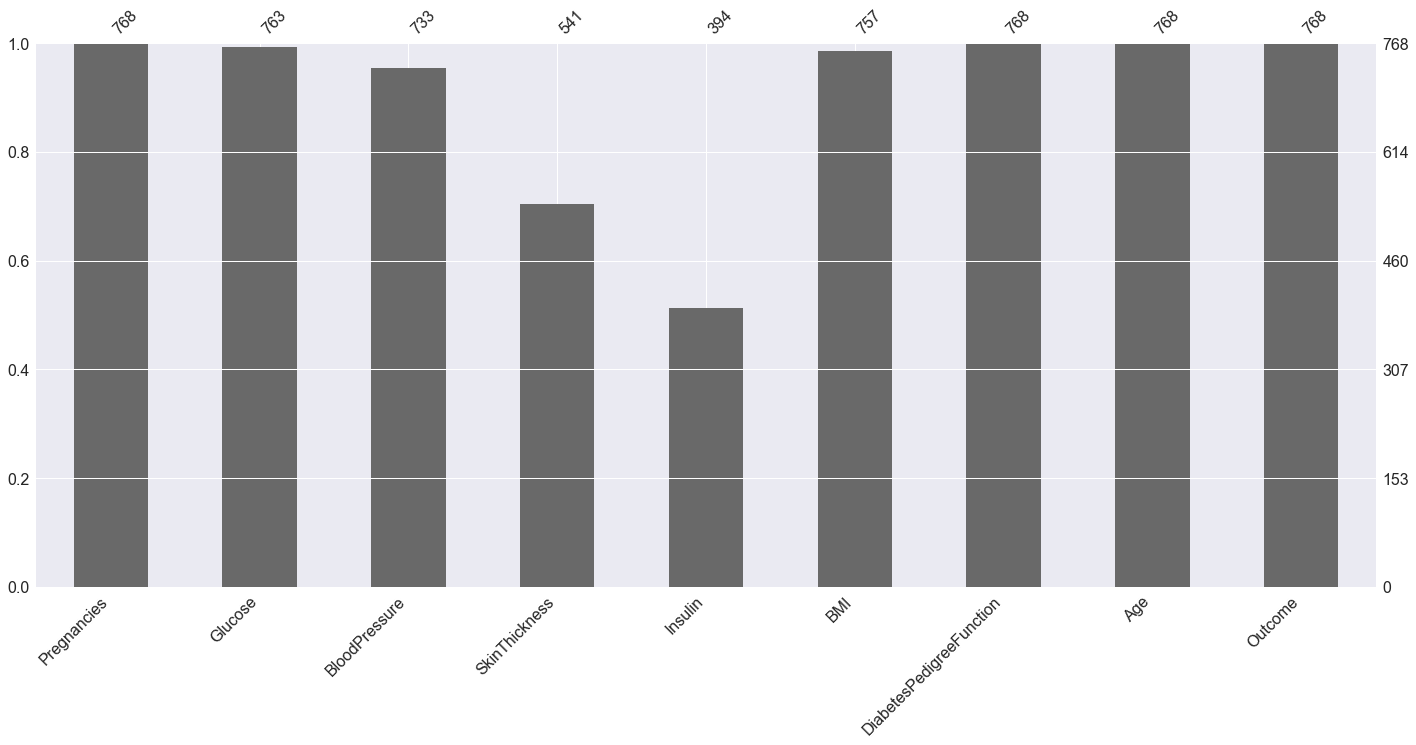

In [ ]:
import missingno as msno

p = msno.bar(diabetes_data)
plt.show()

In [ ]:
thresh_count = diabetes_data.shape[0] * 0.8
diabetes_data = diabetes_data.dropna(thresh=thresh_count, axis=1) 

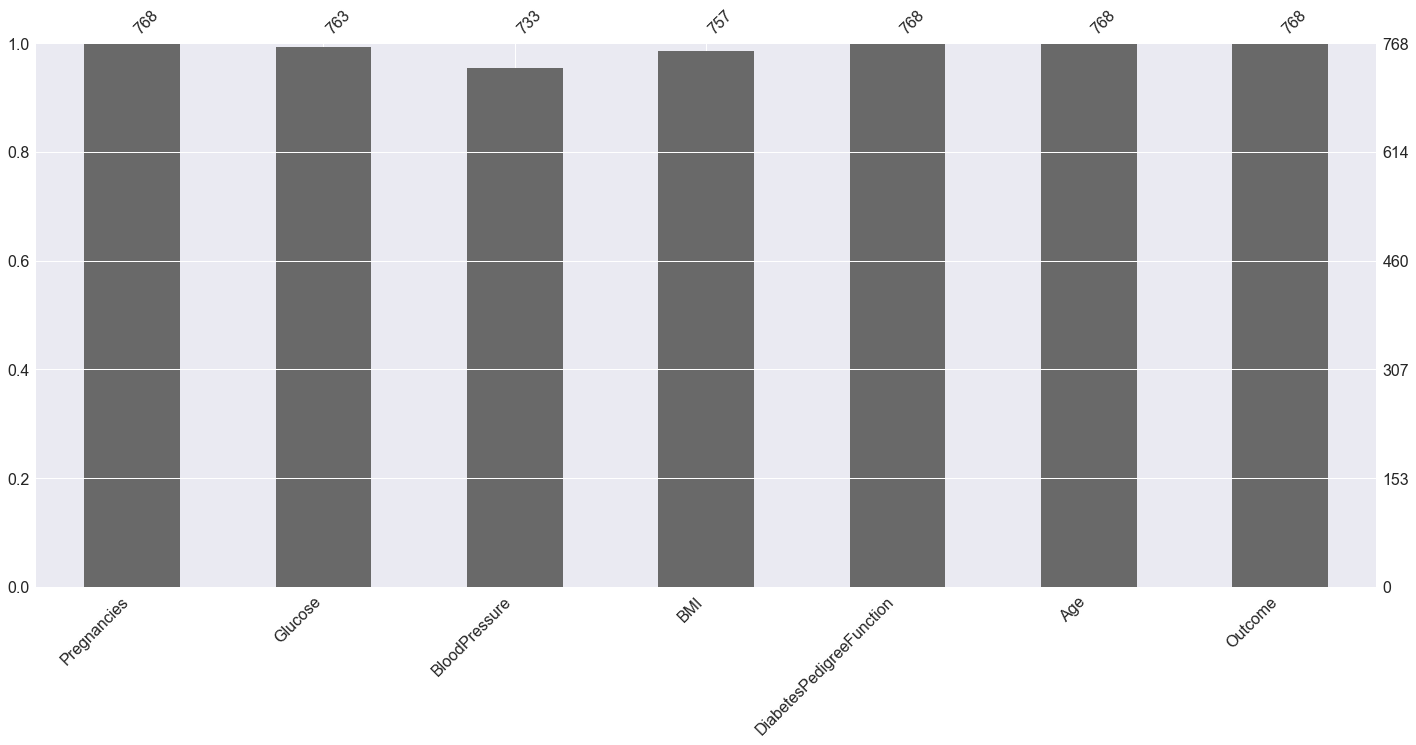

In [ ]:
p = msno.bar(diabetes_data)
plt.show()

In [ ]:
from sklearn.preprocessing import Imputer 

imr = Imputer(missing_values='NaN', strategy='mean', axis=0) 
colume =  ['Glucose', 'BloodPressure', 'BMI']
diabetes_data[colume] = imr.fit_transform(diabetes_data[colume]) 

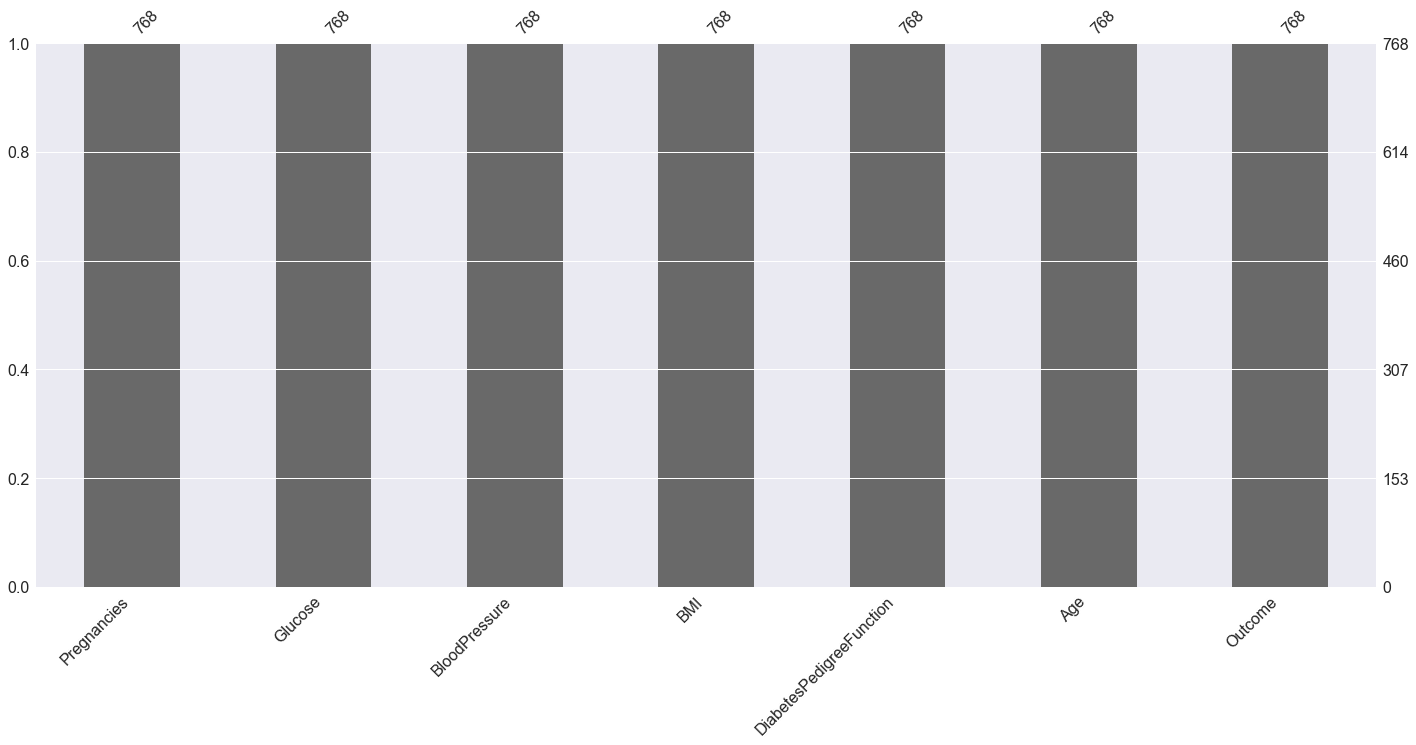

In [ ]:
p = msno.bar(diabetes_data)
plt.show()

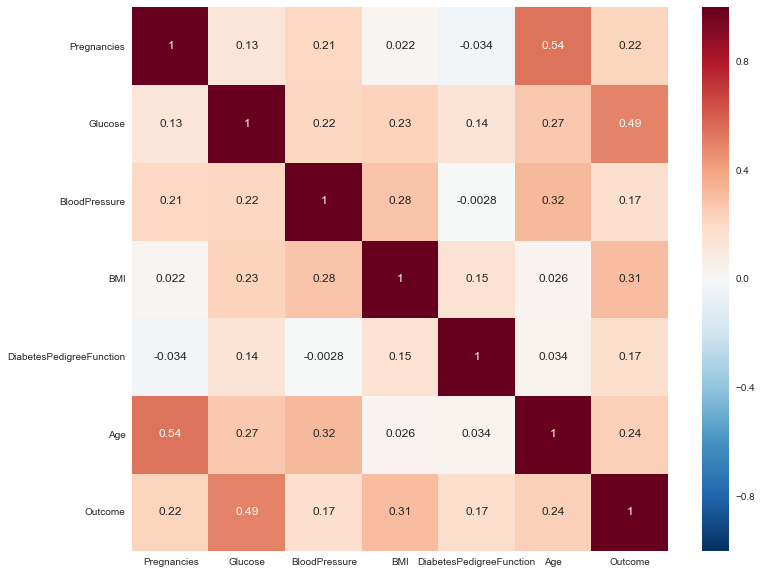

In [ ]:
plt.figure(figsize=(12,10))  
p = sns.heatmap(diabetes_data.corr(), annot=True) 
plt.show()

In [ ]:
x = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train,y_train)

predictions = LR.predict(x_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.93      0.86       150
          1       0.82      0.56      0.66        81

avg / total       0.80      0.80      0.79       231

